<a href="https://colab.research.google.com/github/fran-scala/qml-schwinger-model/blob/main/classical_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical NN

Classical NN training to check if there is overfitting also employing classical ML

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Dataset Creation

Generation of the dataset containing the Schwinger lattices. `dataset_generator.py` contains the functions to both create a lattice, `generator`, and to calculate the Delta value, `Deltal_calculation`. See `dataset_generator.py` to visit the functions. Finally the dataset is divided into a train and test dataset.

In [54]:
symmetry = True
n_qubits = 8
threshold = 2

from dataset_generator import *

X = []
Y = []
np.random.seed(1234)
for i in range(10000):
    v = list(generator(int(n_qubits/2),int(i%4)))
    if v in X:
        pass
    else:
        v = [int(v[j]) for j in range(len(v))]
        X.append(v)
        if Deltal_calculation(v)<threshold:
            Y.append(1)
        else:
            Y.append(0)
print(Y.count(0),Y.count(1))

24 45


In [55]:
np.random.seed(1234)
shuffle_indices = np.random.permutation(len(X))
train_size = int(len(X)*0.7)

train_indices = np.array(shuffle_indices[:train_size])
test_indices = np.array(shuffle_indices[train_size:])

x_train, y_train = np.take(X, train_indices, axis=0), np.take(Y, train_indices, axis=0)
x_test, y_test = np.take(X, test_indices, axis=0), np.take(Y, test_indices, axis=0)

x_train = np.array(x_train)
x_test = np.array(x_test)

for x,y in zip(x_train[:5, :], y_train[:5]):
    print(x,y)

print()

[1 0 0 1 0 0 1 1] 1
[0 0 1 1 1 1 1 1] 1
[0 1 0 0 1 0 0 0] 1
[0 0 1 1 1 0 0 1] 1
[1 1 1 1 0 1 1 0] 0



## Classical Model

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation
from tensorflow.keras.utils import plot_model, set_random_seed
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [58]:
set_random_seed(111)

input_shape = 8
dropoutRate = 0. 

inputArray = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputArray)
x = Dropout(dropoutRate)(x)
x = Dense(40, activation='relu')(x)
x = Dense(20)(x)
x = Activation('relu')(x)
x = Dense(10, activation='relu')(x)
x = Dropout(dropoutRate)(x)
x = Dense(5, activation='relu')(x)
x = Dropout(dropoutRate)(x)
output = Dense(1, activation='sigmoid')(x)#'softmax'

model = Model(inputs=inputArray, outputs=output)

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 40)                2600      
                                                                 
 dense_38 (Dense)            (None, 20)                820       
                                                                 
 activation_6 (Activation)   (None, 20)                0         
                                                                 
 dense_39 (Dense)            (None, 10)                210 

# Training

In [60]:
batch_size = x_train.shape[0]
n_epochs = 100

history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(x_test, y_test),)

Epoch 1/100
1/1 - 6s - loss: 0.6943 - val_loss: 0.7008 - 6s/epoch - 6s/step
Epoch 2/100
1/1 - 0s - loss: 0.6903 - val_loss: 0.6999 - 38ms/epoch - 38ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6866 - val_loss: 0.6985 - 38ms/epoch - 38ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6829 - val_loss: 0.6964 - 37ms/epoch - 37ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6791 - val_loss: 0.6949 - 39ms/epoch - 39ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6755 - val_loss: 0.6932 - 39ms/epoch - 39ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6725 - val_loss: 0.6918 - 43ms/epoch - 43ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6695 - val_loss: 0.6909 - 36ms/epoch - 36ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6668 - val_loss: 0.6900 - 60ms/epoch - 60ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6640 - val_loss: 0.6896 - 41ms/epoch - 41ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6610 - val_loss: 0.6896 - 40ms/epoch - 40ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6578 - val_loss: 0.6898 - 46ms/epoch - 46ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6547 - va

# Plots

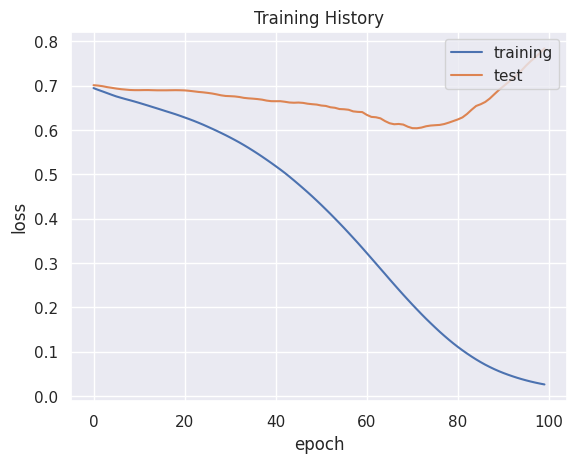

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 7ms/step
[1.9927733  0.9927733  0.937223   0.00230888]
1/1 [==============================] - 0s 27ms/step
[1.993979   0.99397904 0.845938   0.7787084  0.08304915 0.0114921 ]


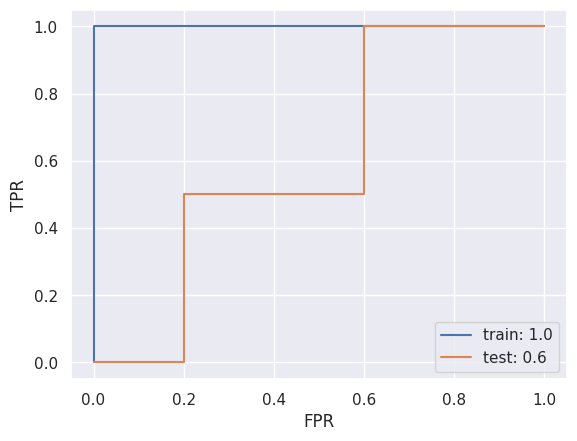

In [62]:
predict_train = model.predict(x_train)

fpr1, tpr1, threshold = roc_curve(y_train, predict_train)
print(threshold)

predict_test = model.predict(x_test)

fpr2, tpr2, threshold = roc_curve(y_test, predict_test)
print(threshold)
auc_ =  auc(fpr1, tpr1)
plt.plot(fpr1,tpr1,label=f'train: {auc_}')
auc_ =  auc(fpr2, tpr2)
plt.plot(fpr2,tpr2,label=f'test: {auc_}')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()